In [1]:
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import re
import os
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
anime_data = pd.read_csv("../input/anime-recommendations-database/anime.csv")
rating_data = pd.read_csv("../input/anime-recommendations-database/rating.csv")

In [3]:
anime_data=anime_data.rename(columns={'name':'anime_title'})
anime_data.head()

,anime_id,anime_title,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_data.dropna(inplace=True)

In [5]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['anime_title'] = anime_data['anime_title'].apply(text_cleaning)

In [6]:
print(anime_data.shape)
anime_data.info()

(12017, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   anime_id     12017 non-null  int64  
 1   anime_title  12017 non-null  object 
 2   genre        12017 non-null  object 
 3   type         12017 non-null  object 
 4   episodes     12017 non-null  object 
 5   rating       12017 non-null  float64
 6   members      12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [7]:
print(rating_data.shape)
rating_data.info()

(7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [8]:
anime_fulldata=pd.merge(anime_data,rating_data,on='anime_id',suffixes=['','_user'])
anime_fulldata.head()


,anime_id,anime_title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [9]:
anime_fulldata=anime_fulldata.rename(columns={'rating_user':'user_rating'})
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [10]:
combined_anime_rating = anime_fulldata.dropna(axis = 0, subset = ['anime_title'])
combined_anime_rating.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


# Drawing figure to understand more about the dataset

## Top 10 anime based on number of ratings

In [11]:
anime_rating_count = combined_anime_rating.groupby(['anime_title'])['user_rating'].count().reset_index().rename(columns={'user_rating':'number_of_users_rating'})
top10_anime_rating=anime_rating_count[['anime_title','number_of_users_rating']].sort_values('number_of_users_rating',ascending=False).head(10)
top10_anime_rating

,anime_title,number_of_users_rating
1812,Death Note,39340
9478,Sword Art Online,30583
8827,Shingeki no Kyojin,29584
1527,Code Geass: Hangyaku no Lelouch,27718
2335,Elfen Lied,27506
368,Angel Beats!,27183
6750,Naruto,25925
2571,Fullmetal Alchemist,25032
2572,Fullmetal Alchemist: Brotherhood,24574
10077,Toradora!,24283


## We now plot top 10 animes that have been most rated

Text(0.5, 1.0, '10 animes that have been most rated (based on counting) ')

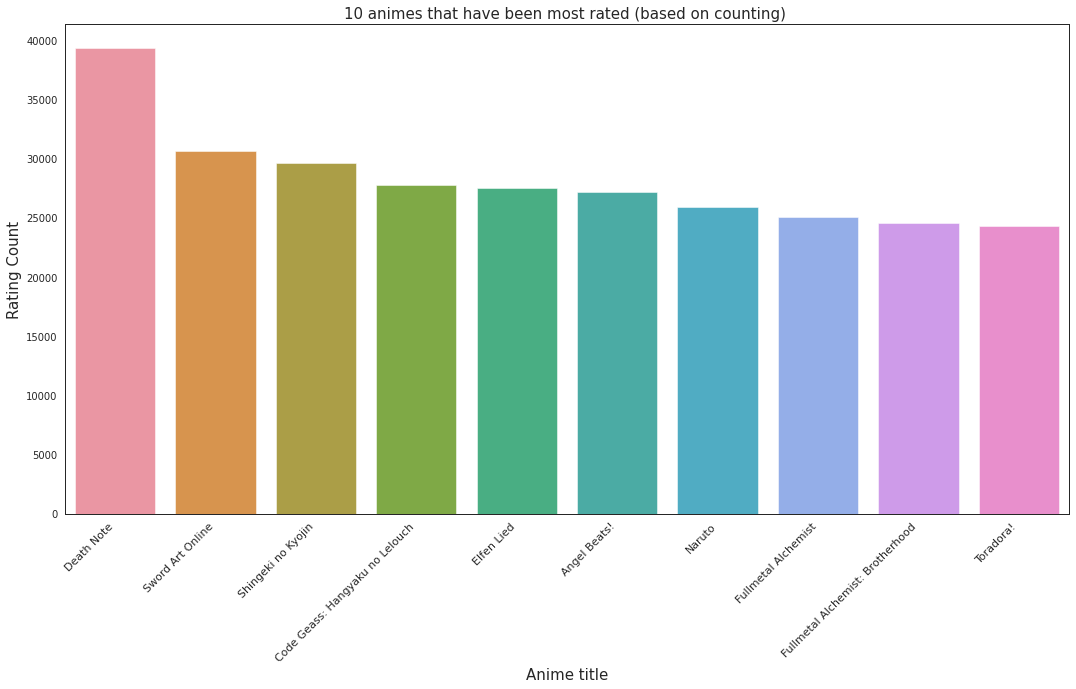

In [12]:
fig,ax=plt.subplots(figsize=(18,9))
ax=sns.barplot(x='anime_title',y='number_of_users_rating',data=top10_anime_rating)
ax.set_xlabel("Anime title",fontsize=15)
ax.set_ylabel("Rating Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=45, ha='right')
ax.set_title("10 animes that have been most rated (based on counting) ",fontsize=15)

## Top 10 anime based on community size

In [13]:
anime_members_count = anime_data.sort_values(by='members',ascending=False).head(10)
anime_members_count

,anime_id,anime_title,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


Text(0.5, 1.0, '10 animes that have the largest community ')

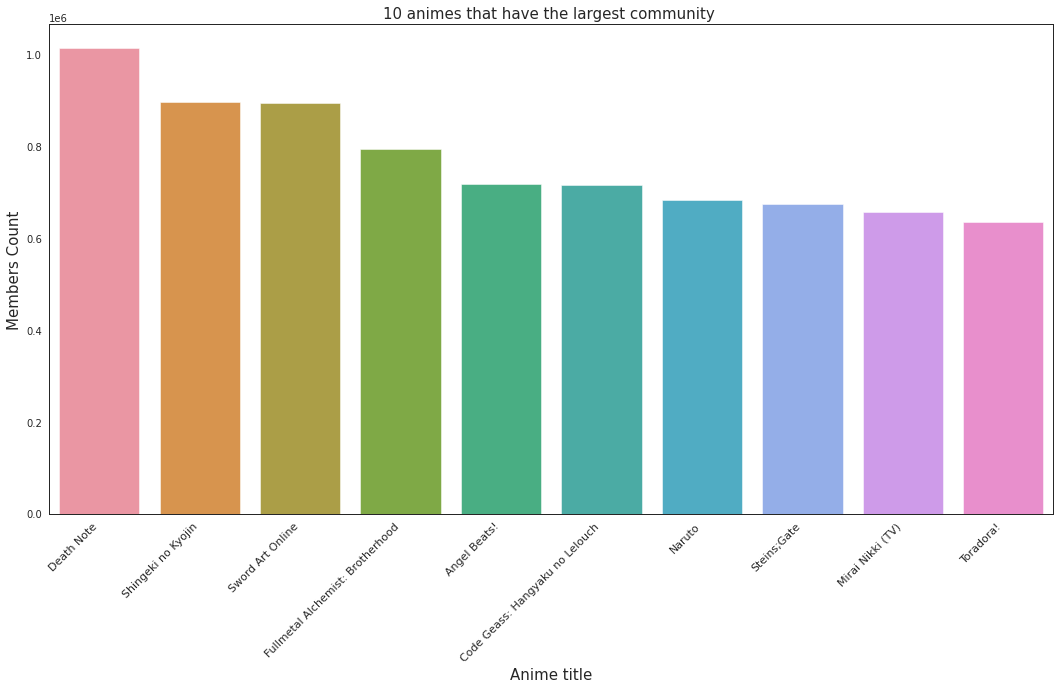

In [14]:
fig,ax=plt.subplots(figsize=(18,9))
ax=sns.barplot(x='anime_title',y='members',data=anime_members_count)
ax.set_xlabel("Anime title",fontsize=15)
ax.set_ylabel("Members Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=45, ha='right')
ax.set_title("10 animes that have the largest community ",fontsize=15)

## Top 10 anime that has longest episodes

In [15]:
anime_data[anime_data['episodes'] == 'Unknown']['anime_title'][:5]

74                                   One Piece
252                            Detective Conan
615                         Naruto: Shippuuden
991                           Crayon Shin-chan
1021    Tanaka-kun wa Itsumo Kedaruge Specials
Name: anime_title, dtype: object

In [16]:
anime_episode=anime_data[anime_data['episodes']!='Unknown'][['anime_title','episodes']]
anime_episode['episodes']=anime_episode['episodes'].astype('int')
anime_episodes_top_10=anime_episode.sort_values('episodes',ascending=False).head(10)
anime_episodes_top_10

,anime_title,episodes
6296,Oyako Club,1818
929,Doraemon (1979),1787
9243,Kirin Monoshiri Yakata,1565
5360,Manga Nippon Mukashibanashi (1976),1471
6580,Hoka Hoka Kazoku,1428
9242,Kirin Ashita no Calendar,1306
9613,Monoshiri Daigaku: Ashita no Calendar,1274
10165,Sekai Monoshiri Ryoko,1006
9317,Kotowaza House,773
6118,Shima Shima Tora no Shimajirou,726


Text(0.5, 1.0, '10 animes that have the highest episodes ')

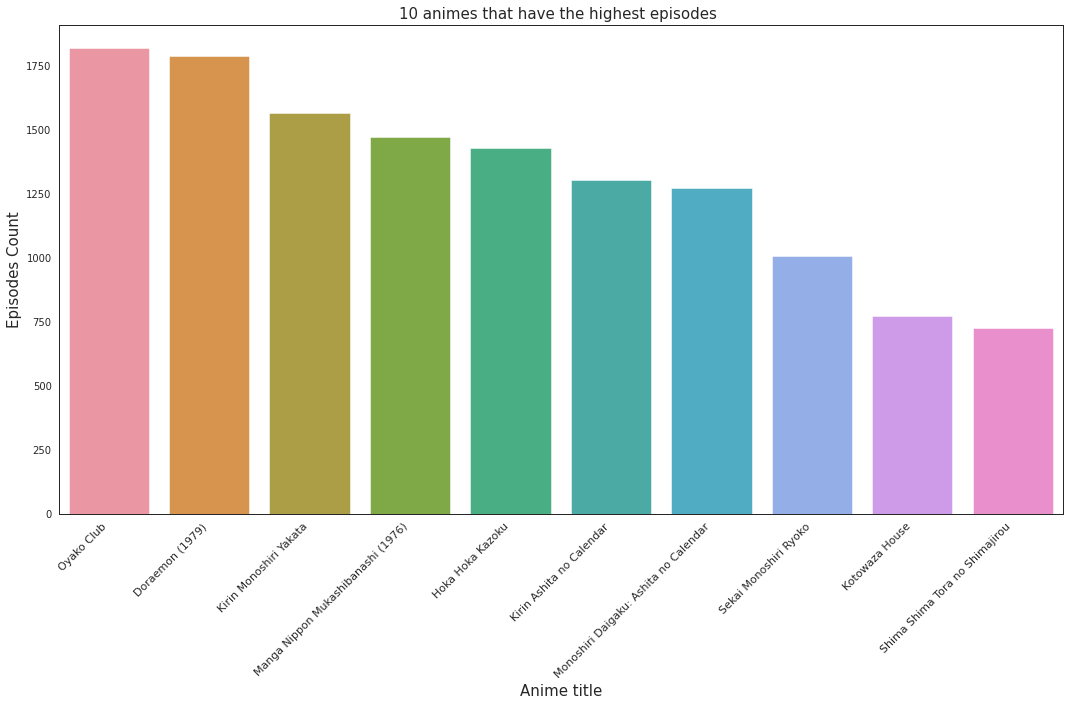

In [17]:
fig,ax = plt.subplots(figsize=(18,9))
ax = sns.barplot(x='anime_title',y='episodes',data=anime_episodes_top_10)
ax.set_xlabel("Anime title",fontsize=15)
ax.set_ylabel("Episodes Count",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=45, ha='right')
ax.set_title("10 animes that have the highest episodes ",fontsize=15)

## Top 10 anime that has the higest rating based on members in community>50000

In [18]:
anime_rating_based_on_community=anime_data[['anime_title','rating','type','members']].sort_values(by='rating',ascending=False)
anime_rating_based_on_community=anime_rating_based_on_community[anime_rating_based_on_community['members']>50000]
anime_rating_based_on_community

,anime_title,rating,type,members
0,Kimi no Na wa.,9.37,Movie,200630
1,Fullmetal Alchemist: Brotherhood,9.26,TV,793665
2,Gintama°,9.25,TV,114262
3,Steins;Gate,9.17,TV,673572
4,Gintama,9.16,TV,151266
...,...,...,...,...
6998,Mayoiga,5.80,TV,117090
7125,Big Order (TV),5.70,TV,84079
7325,Glasslip,5.54,TV,94108
12217,Boku no Pico,5.13,OVA,57355


## Top 10 OVA has the highest rating

In [19]:
anime_ova=anime_data[['anime_title','rating','type']].sort_values(by='rating',ascending=False)
anime_ova=anime_ova[anime_ova['type']=='OVA'].head(10)
anime_ova

,anime_title,rating,type
10786,Yakusoku: Africa Mizu to Midori,9.25,OVA
7,Ginga Eiyuu Densetsu,9.11,OVA
10136,Santa-san wa Dai Isogashi,9.00,OVA
9539,Mienu Me ni Kanjita Kumotoriyama no Asahi,9.00,OVA
21,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.83,OVA
41,Gintama°: Aizome Kaori-hen,8.69,OVA
10793,Yamete! Writer Asobi: Doubutsu Mura no Shoubou...,8.67,OVA
10847,Yume no Tsuzuki,8.67,OVA
9208,Kie Saranu Kizuato: Hi no Umi Osaka,8.67,OVA
9567,Minna no Doutoku,8.67,OVA


Text(0.5, 1.0, '10 OVA that have the highest rating ')

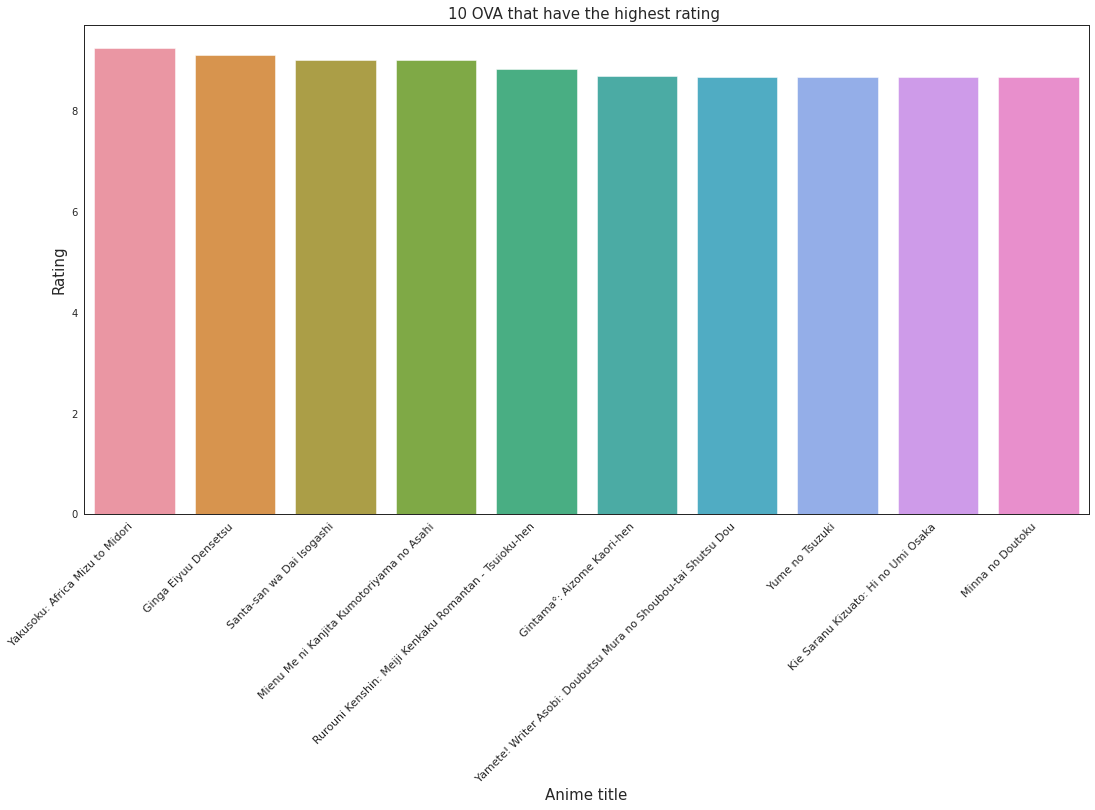

In [20]:
fig,ax = plt.subplots(figsize=(18,9))
ax = sns.barplot(x='anime_title',y='rating',data=anime_ova)
ax.set_xlabel("Anime title",fontsize=15)
ax.set_ylabel("Rating",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=45, ha='right')
ax.set_title("10 OVA that have the highest rating ",fontsize=15)

In [21]:
anime_fulldata['rating'].value_counts()

8.06    85157
8.17    82288
7.81    80171
7.87    77976
7.95    76850
        ...  
3.38        1
3.42        1
4.18        1
3.26        1
4.09        1
Name: rating, Length: 585, dtype: int64

## Distribution of anime ratings

Text(0.5, 1.0, 'Rating of users')

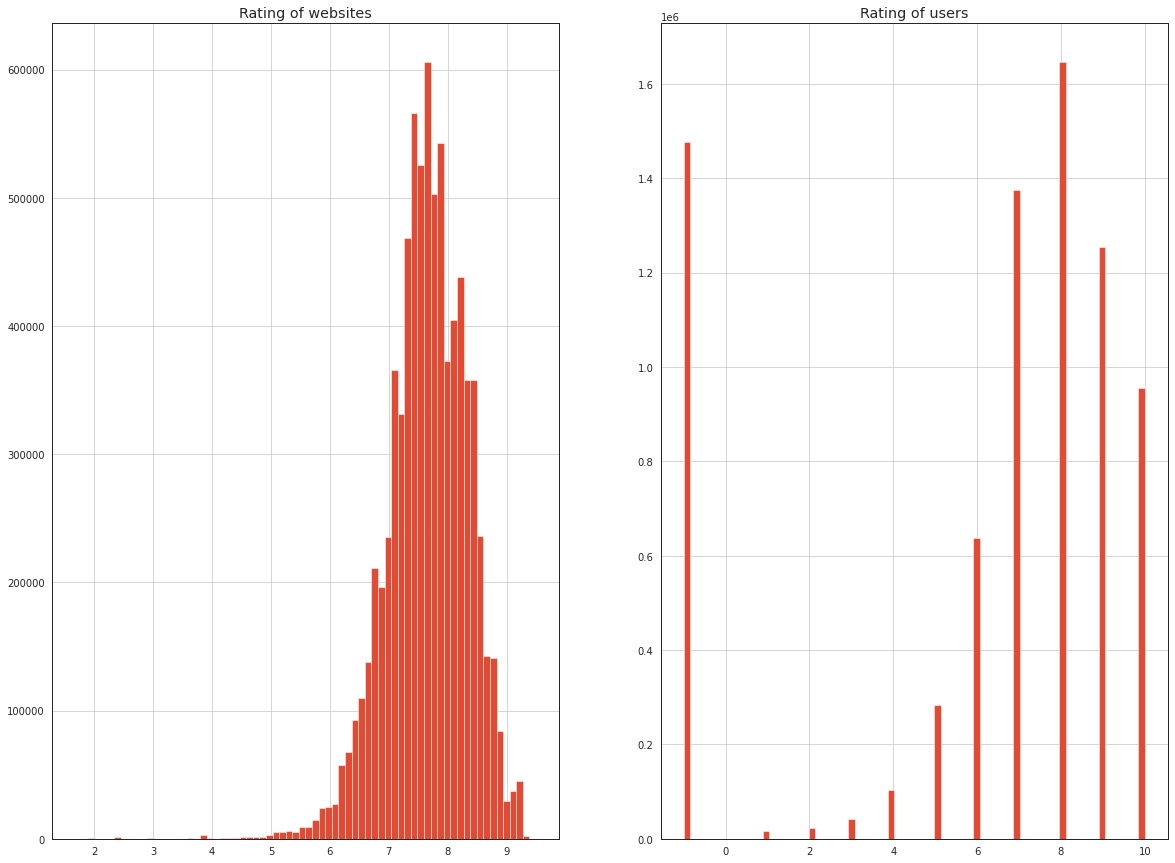

In [22]:
fig,axes=plt.subplots(1,2,figsize=(20,15))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title("Rating of websites")
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title("Rating of users")

## Pie chart to show what streaming the anime comes from

Text(0.5, 1.0, 'Medium of streaming')

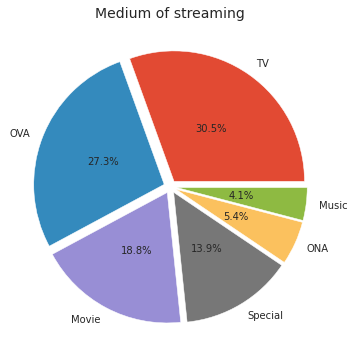

In [23]:
anime_streaming = anime_data['type'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x = anime_streaming, labels = anime_streaming.keys(),explode=[0.05]*6, autopct="%.1f%%", pctdistance=0.5)
plt.title("Medium of streaming", fontsize=14)


## Recommendation

In [24]:
anime_data=pd.read_csv("../input/anime-recommendations-database/anime.csv")
rating_data=pd.read_csv("../input/anime-recommendations-database/rating.csv")

In [25]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [26]:
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [27]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [28]:
rating_data = rating_data[rating_data['rating'] !=-1]

In [29]:
rating_average = rating_data.groupby('anime_id')['rating'].mean()
rating_count = rating_data.groupby('anime_id')['rating'].count()


In [30]:
anime_data = anime_data.merge(rating_average, on='anime_id', how='left')
anime_data = anime_data.merge(rating_count, on='anime_id', how='left')


In [31]:
anime_data = anime_data.rename(columns={'rating_x' : 'web_rating', 'rating' : 'number_of_rates', 'rating_y': 'average_user_rating'})
anime_data.head()

,anime_id,name,genre,type,episodes,web_rating,members,average_user_rating,number_of_rates
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.426313,1961.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.322741,21494.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9.449495,1188.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.261326,17151.0
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,9.272552,3115.0


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

genres_str = anime_data['genre'].str.split(',').astype(str)
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 4), min_df=0)
tfidf_matrix = tfidf.fit_transform(genres_str)

In [33]:
indices = pd.Series(anime_data.index, index=anime_data['name'])
indices

name
Kimi no Na wa.                                            0
Fullmetal Alchemist: Brotherhood                          1
Gintama°                                                  2
Steins;Gate                                               3
Gintama                                                   4
                                                      ...  
Toushindai My Lover: Minami tai Mecha-Minami          12289
Under World                                           12290
Violence Gekiga David no Hoshi                        12291
Violence Gekiga Shin David no Hoshi: Inma Densetsu    12292
Yasuji no Pornorama: Yacchimae!!                      12293
Length: 12294, dtype: int64

In [34]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)

(12294, 12294)


In [35]:
average_rates = anime_data['average_user_rating']
count_rates = anime_data[anime_data['number_of_rates'].notnull()]['number_of_rates'].astype('int')

In [36]:
C = average_rates.mean()
m = count_rates.quantile(0.65)

In [37]:
print(C,m)

6.637701989215879 168.0


In [38]:
def weighted_rating(x , C):
    v = x['number_of_rates']
    R = x['average_user_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

def takeSecondElement(elem):
    return elem[1]

# given a movie name, find 10 recommended movies based on genre, rating and number of vote
def genre_recommendation(title):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=takeSecondElement, reverse=True)
    sim_scores=sim_scores[1:25]
    anime_id=[i[0] for i in sim_scores]
    anime_similarity=[i[1] for i in sim_scores]
    
    anime_top25 = anime_data.iloc[anime_id]
    anime_qualified = anime_top25[(anime_top25['number_of_rates'] >=10) & (anime_top25['number_of_rates'].notnull()) & (anime_top25['average_user_rating'].notnull())]
    anime_qualified['number_of_rates'] = anime_qualified['number_of_rates'].astype('int')
    anime_qualified['average_user_rating'] = anime_qualified['average_user_rating'].astype('int')
    anime_qualified['wr'] = anime_qualified.apply(lambda x: weighted_rating(x,C) , axis=1)
    anime_qualified = anime_qualified.sort_values('wr', ascending=False).head(10)
    
    return anime_qualified

genre_recommendation('Kimi no Na wa.')

,anime_id,name,genre,type,episodes,web_rating,members,average_user_rating,number_of_rates,wr
401,14813,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Drama, Romance, School",TV,13,8.12,353876,8,10099,7.977709
504,6351,"Clannad: After Story - Mou Hitotsu no Sekai, K...","Drama, Romance, School",Special,1,8.02,138364,8,6469,7.965517
219,23847,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Drama, Romance, School",TV,13,8.31,222994,8,5493,7.959571
208,28725,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",Movie,1,8.32,59652,8,911,7.787891
1907,2926,Myself; Yourself,"Drama, Romance, School",TV,13,7.41,115075,7,4472,6.986882
1435,2129,True Tears,"Drama, Romance, School",TV,13,7.55,118644,7,4453,6.986828
2078,15379,Kotoura-san,"Comedy, Drama, Romance, School",TV,12,7.36,123691,7,3669,6.984137
2300,12175,Koi to Senkyo to Chocolate,"Drama, Romance, School",TV,12,7.30,91552,7,2702,6.978792
1631,2927,Kimikiss Pure Rouge,"Drama, Romance, School",TV,24,7.48,58211,7,2144,6.973674
1436,8481,Bungaku Shoujo Memoire,"Drama, Romance, School",OVA,3,7.54,18013,7,662,6.926667


## We have finished rating using content based filtering, we will move on collaborative filtering

In [39]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader(rating_scale=(0, 10))

In [40]:
data = Dataset.load_from_df(rating_data[['user_id', 'anime_id', 'rating']], reader)
svd = SVD()

In [41]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [42]:
svd.predict(152, 33281, 10)

Prediction(uid=152, iid=33281, r_ui=10, est=7.543612160867745, details={'was_impossible': False})

In [43]:
def hybrid_recommendation(userId, title):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=takeSecondElement, reverse=True)
    sim_scores=sim_scores[1:50]
    anime_id=[i[0] for i in sim_scores]
    anime_similarity=[i[1] for i in sim_scores]
    
    anime_top50 = anime_data.iloc[anime_id]
    anime_qualified = anime_top50[(anime_top50['number_of_rates'] >=10) & (anime_top50['number_of_rates'].notnull()) & (anime_top50['average_user_rating'].notnull())]
    anime_qualified['number_of_rates'] = anime_qualified['number_of_rates'].astype('int')
    anime_qualified['average_user_rating'] = anime_qualified['average_user_rating'].astype('int')
    anime_qualified['wr'] = anime_qualified.apply(lambda x: weighted_rating(x,C) , axis=1)
    
    anime_qualified['est'] = anime_qualified['anime_id'].apply(lambda x: svd.predict(userId, x).est)
    anime_qualified = anime_qualified.sort_values('est', ascending=False)
    return anime_qualified.head(10)

hybrid_recommendation(5, 'Tooi Sekai')
    

,anime_id,name,genre,type,episodes,web_rating,members,average_user_rating,number_of_rates,wr,est
208,28725,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",Movie,1,8.32,59652,8,911,7.787891,7.152639
4861,2210,Tooi Sekai,"Drama, Romance",ONA,1,6.62,11347,6,553,6.148591,6.896913
1595,2460,Maison Ikkoku: Kanketsu-hen,"Comedy, Drama, Romance",Movie,1,7.49,3109,7,104,6.776228,5.912577
5786,14247,Lunn wa Kaze no Naka,"Drama, Romance",OVA,1,6.35,403,6,17,6.579102,5.847834
1436,8481,Bungaku Shoujo Memoire,"Drama, Romance, School",OVA,3,7.54,18013,7,662,6.926667,5.610212
4006,2387,Ai Monogatari: 9 Love Stories,"Drama, Romance",OVA,1,6.82,2060,7,58,6.730681,5.498931
6406,2468,Nineteen 19,"Drama, Romance",OVA,1,6.13,1402,6,44,6.505349,5.247737
3027,3484,Maison Ikkoku: Prelude - Meguru Haru no Sakura...,"Comedy, Drama, Romance",Special,1,7.10,1672,7,37,6.703092,5.080563
2555,2459,Maison Ikkoku: Ikkokujima Nanpa Shimatsuki,"Comedy, Drama, Romance",OVA,1,7.23,2341,7,67,6.740995,4.894171
7228,7504,Bologee Story,"Drama, Romance",ONA,1,5.62,336,5,14,6.511725,4.751460


In [44]:
hybrid_recommendation(6, 'Tooi Sekai')

,anime_id,name,genre,type,episodes,web_rating,members,average_user_rating,number_of_rates,wr,est
208,28725,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",Movie,1,8.32,59652,8,911,7.787891,8.567574
504,6351,"Clannad: After Story - Mou Hitotsu no Sekai, K...","Drama, Romance, School",Special,1,8.02,138364,8,6469,7.965517,8.088887
1081,587,Hanbun no Tsuki ga Noboru Sora,"Comedy, Drama, Romance",TV,6,7.69,65125,7,2609,6.978082,7.905352
1595,2460,Maison Ikkoku: Kanketsu-hen,"Comedy, Drama, Romance",Movie,1,7.49,3109,7,104,6.776228,7.866042
5786,14247,Lunn wa Kaze no Naka,"Drama, Romance",OVA,1,6.35,403,6,17,6.579102,7.864210
1436,8481,Bungaku Shoujo Memoire,"Drama, Romance, School",OVA,3,7.54,18013,7,662,6.926667,7.854036
1721,710,Rec,"Comedy, Drama, Romance",TV,9,7.46,68951,7,2911,6.980232,7.712737
2555,2459,Maison Ikkoku: Ikkokujima Nanpa Shimatsuki,"Comedy, Drama, Romance",OVA,1,7.23,2341,7,67,6.740995,7.706818
1435,2129,True Tears,"Drama, Romance, School",TV,13,7.55,118644,7,4453,6.986828,7.691842
1907,2926,Myself; Yourself,"Drama, Romance, School",TV,13,7.41,115075,7,4472,6.986882,7.677538


In [45]:
hybrid_recommendation(33, 'Tooi Sekai')

,anime_id,name,genre,type,episodes,web_rating,members,average_user_rating,number_of_rates,wr,est
208,28725,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",Movie,1,8.32,59652,8,911,7.787891,8.733818
504,6351,"Clannad: After Story - Mou Hitotsu no Sekai, K...","Drama, Romance, School",Special,1,8.02,138364,8,6469,7.965517,8.473264
1081,587,Hanbun no Tsuki ga Noboru Sora,"Comedy, Drama, Romance",TV,6,7.69,65125,7,2609,6.978082,8.389531
1721,710,Rec,"Comedy, Drama, Romance",TV,9,7.46,68951,7,2911,6.980232,8.235369
1595,2460,Maison Ikkoku: Kanketsu-hen,"Comedy, Drama, Romance",Movie,1,7.49,3109,7,104,6.776228,8.198357
1907,2926,Myself; Yourself,"Drama, Romance, School",TV,13,7.41,115075,7,4472,6.986882,8.089962
1435,2129,True Tears,"Drama, Romance, School",TV,13,7.55,118644,7,4453,6.986828,8.066670
3332,126,Futakoi Alternative,"Comedy, Drama, Romance",TV,13,7.02,21516,7,711,6.930755,8.047622
3211,3318,Kimi ga Nozomu Eien: Next Season,"Drama, Romance",OVA,4,7.05,21064,7,828,6.938889,8.044662
4006,2387,Ai Monogatari: 9 Love Stories,"Drama, Romance",OVA,1,6.82,2060,7,58,6.730681,8.020535
